# Data Initialization

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Cargar datos
df = pd.read_csv("../data/dirty_cafe_sales.csv")

# Vista general
print(df.head())
print(df.info())
print(df.isnull().sum())  # Valores nulos
print(df.duplicated().sum())  # Filas duplicadas
print(df.shape[0]) 

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   obj

In [3]:
# Opción 1: Eliminar filas con nulos en columna crítica
df.replace(['N/A', 'na', '--', 'null', 'sin dato', 'UNKNOWN', 'ERROR'], np.nan, inplace=True)
df_clean = df.dropna(subset=['Item', 'Quantity', 'Price Per Unit', 'Payment Method', 'Location', 'Transaction Date']).drop_duplicates()

df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce')
df_clean['Price Per Unit'] = pd.to_numeric(df_clean['Price Per Unit'], errors='coerce')
df_clean['Total Spent'] = df_clean['Quantity'] * df_clean['Price Per Unit']

print(df_clean.duplicated().sum())

print(df_clean.isnull().sum()) 
print(df_clean.shape[0]) 

0
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64
3234


In [5]:
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['Price Per Unit'] > 0)]
df_clean['Payment Method'] = df_clean['Payment Method'].str.strip().str.title()
df_clean['Location'] = df_clean['Location'].str.strip().str.title()
df_clean['Total Spent'] = df_clean['Quantity'] * df_clean['Price Per Unit']


df_clean['Item'] = df_clean['Item'].str.strip()
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'], errors='coerce')

print(df_clean.shape[0]) 
print(df_clean.head())

3234
   Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0     TXN_1961373  Coffee         2             2.0          4.0   
1     TXN_4977031    Cake         4             3.0         12.0   
2     TXN_4271903  Cookie         4             1.0          4.0   
4     TXN_3160411  Coffee         2             2.0          4.0   
10    TXN_2548360   Salad         5             5.0         25.0   

    Payment Method  Location Transaction Date  
0      Credit Card  Takeaway       2023-09-08  
1             Cash  In-Store       2023-05-16  
2      Credit Card  In-Store       2023-07-19  
4   Digital Wallet  In-Store       2023-06-11  
10            Cash  Takeaway       2023-11-07  


# Data Analysis

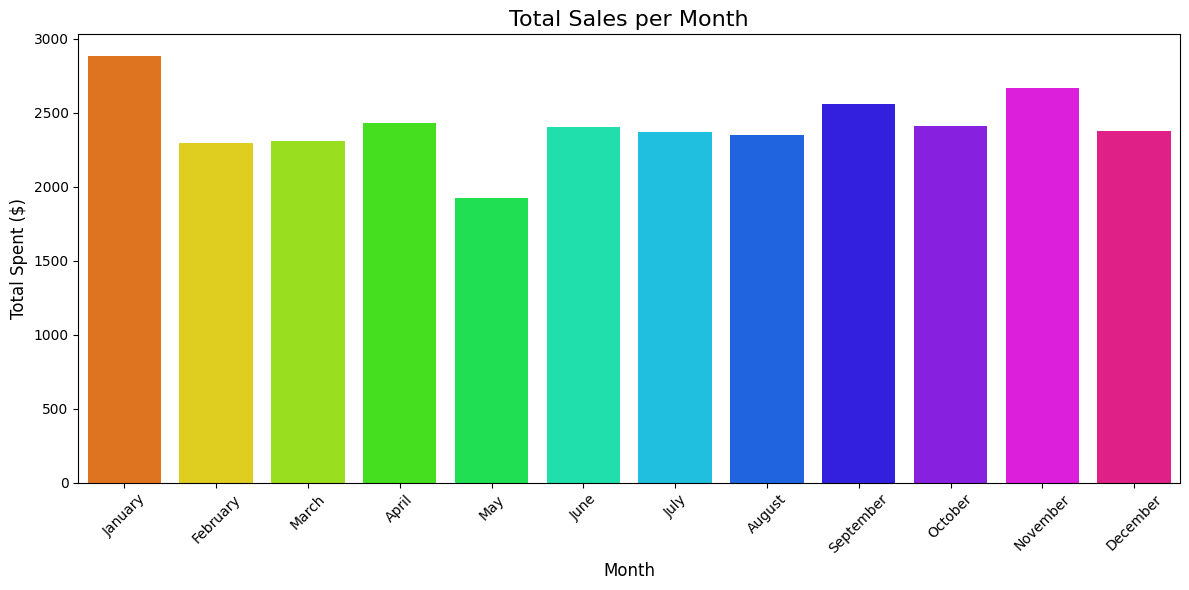

In [8]:
# Crea las columnas 'Month' y 'Month Name'
df_clean['Month'] = df_clean['Transaction Date'].dt.month
df_clean['Month Name'] = df_clean['Transaction Date'].dt.month_name()

# Agrupar por mes
monthly_sales = df_clean.groupby(['Month', 'Month Name'])['Total Spent'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')

# Paleta arcoíris
colors = sns.color_palette("hsv", len(monthly_sales))

# --- Visualización corregida ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_sales,
    x='Month Name',
    y='Total Spent',
    hue='Month Name',       # Asigna los colores por mes
    palette=colors,
    legend=False            # No muestra leyenda redundante
)

# Estética
plt.title("Total Sales per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Spent ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

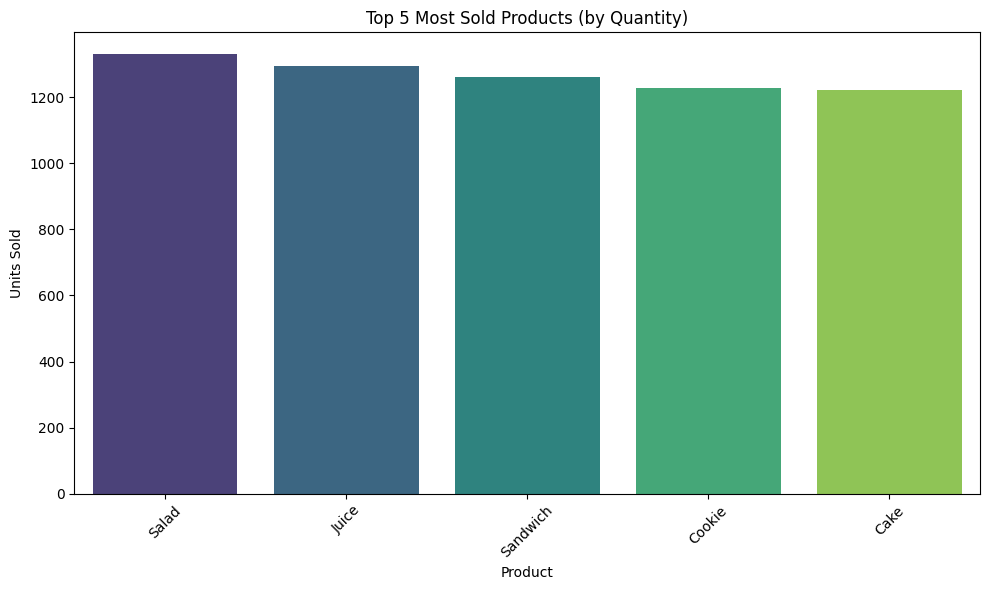

In [12]:
# --- Preparar datos ---
top_items_qty = df_clean.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(5).reset_index()

# --- Visualización sin warnings ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_items_qty,
    x='Item',
    y='Quantity',
    hue='Item',             # ← Añadido para evitar el warning
    palette='viridis',
    legend=False           # ← Oculta leyenda duplicada
)
plt.title("Top 5 Most Sold Products (by Quantity)")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

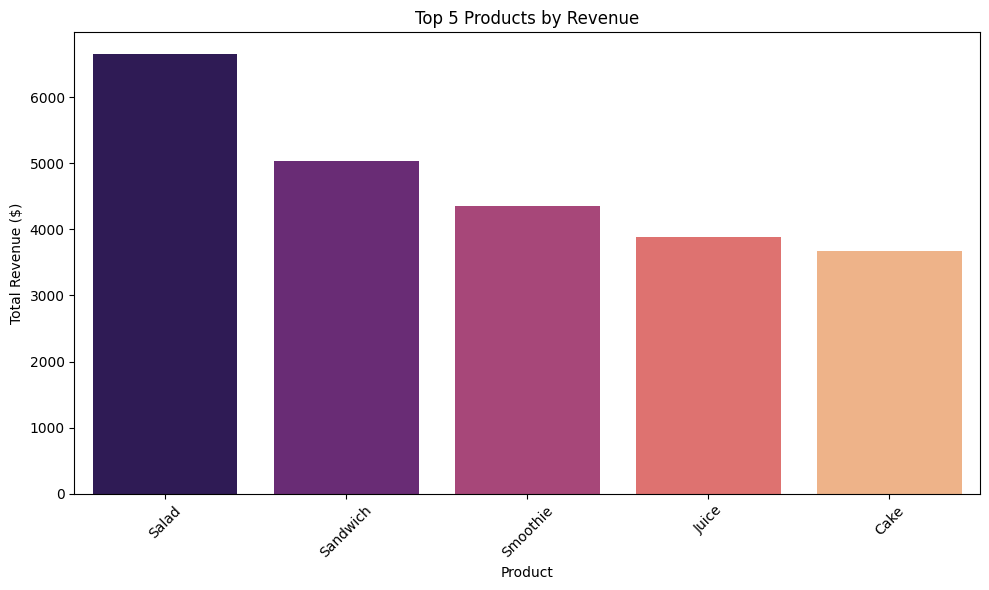

In [13]:
top_items_revenue = df_clean.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_items_revenue, x='Item', y='Total Spent', hue='Item', palette='magma', legend=False)
plt.title("Top 5 Products by Revenue")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


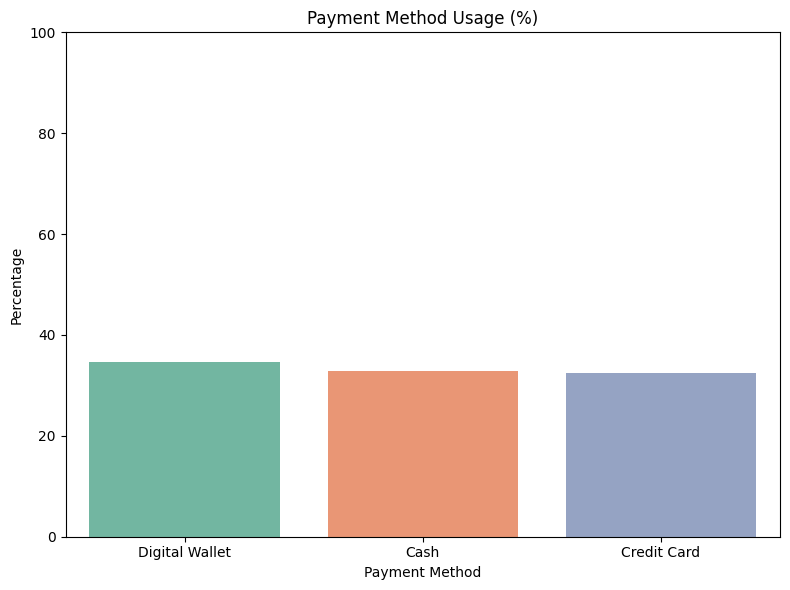

In [14]:
payment_counts = df_clean['Payment Method'].value_counts(normalize=True).mul(100).reset_index()
payment_counts.columns = ['Payment Method', 'Percentage']

plt.figure(figsize=(8, 6))
sns.barplot(data=payment_counts, x='Payment Method', y='Percentage', hue='Payment Method', palette='Set2', legend=False)
plt.title("Payment Method Usage (%)")
plt.ylabel("Percentage")
plt.xlabel("Payment Method")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


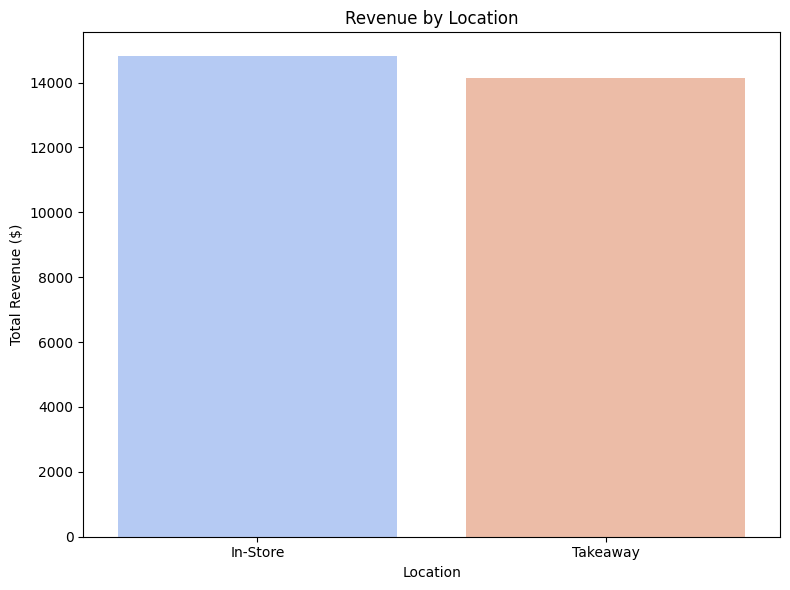

In [15]:
location_revenue = df_clean.groupby('Location')['Total Spent'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=location_revenue, x='Location', y='Total Spent', hue='Location', palette='coolwarm', legend=False)
plt.title("Revenue by Location")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Location")
plt.tight_layout()
plt.show()


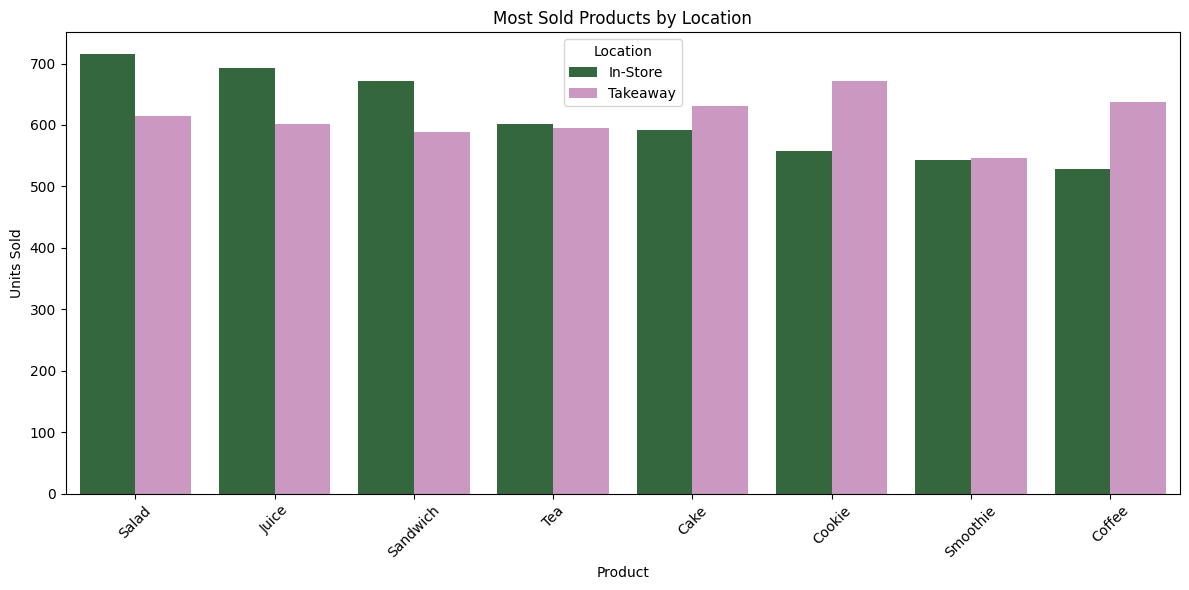

In [16]:
top_by_location = df_clean.groupby(['Location', 'Item'])['Quantity'].sum().reset_index()
top_by_location = top_by_location.sort_values(['Location', 'Quantity'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_by_location, x='Item', y='Quantity', hue='Location', palette='cubehelix')
plt.title("Most Sold Products by Location")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


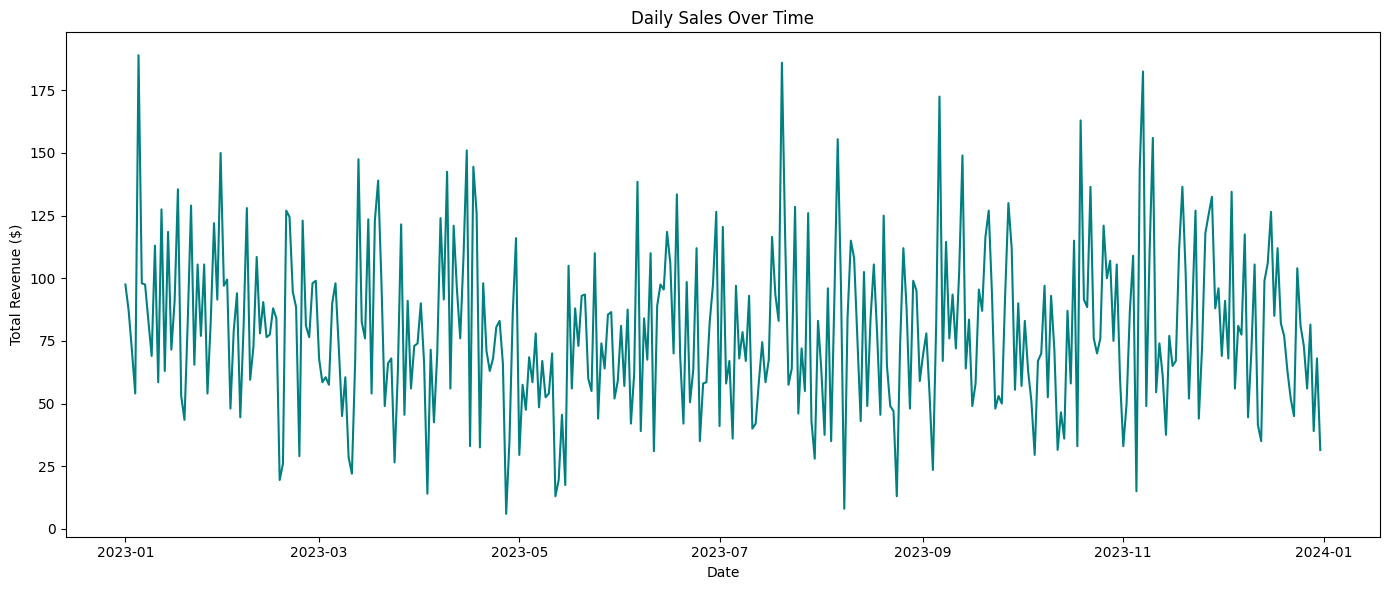

In [17]:
daily_sales = df_clean.groupby('Transaction Date')['Total Spent'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Transaction Date', y='Total Spent', color='teal')
plt.title("Daily Sales Over Time")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [18]:
# Suponiendo que los productos comprados el mismo día fueron en conjunto
co_purchase = df_clean.groupby('Transaction Date')['Item'].apply(lambda x: ', '.join(sorted(x.dropna().unique()))).value_counts().head(10)

print("🔹 Most Common Product Combos (by Date):")
print(co_purchase)


🔹 Most Common Product Combos (by Date):
Item
Cake, Coffee, Cookie, Juice, Salad, Sandwich, Smoothie, Tea    17
Cake, Cookie, Juice, Salad, Sandwich, Smoothie, Tea            11
Cake, Coffee, Cookie, Juice, Sandwich, Smoothie, Tea            8
Cake, Cookie, Juice, Salad, Sandwich, Tea                       8
Cake, Coffee, Juice, Salad, Sandwich, Smoothie, Tea             7
Coffee, Cookie, Juice, Salad, Sandwich, Smoothie, Tea           7
Cake, Coffee, Cookie, Juice, Salad, Sandwich                    7
Cake, Coffee, Cookie, Juice, Salad, Smoothie, Tea               7
Cake, Coffee, Cookie, Juice, Salad, Sandwich, Smoothie          6
Coffee, Cookie, Salad, Sandwich, Smoothie, Tea                  6
Name: count, dtype: int64
